In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')

In [3]:
train.head(5)

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [4]:
train['target'].unique()

array(['Streptococcus_pyogenes', 'Salmonella_enterica',
       'Enterococcus_hirae', 'Escherichia_coli', 'Campylobacter_jejuni',
       'Streptococcus_pneumoniae', 'Staphylococcus_aureus',
       'Escherichia_fergusonii', 'Bacteroides_fragilis',
       'Klebsiella_pneumoniae'], dtype=object)

In [5]:
train.shape , test.shape

((200000, 288), (100000, 287))

In [6]:
# saving row_id for submission
row_id = test['row_id']
test.drop('row_id' , axis = 1 , inplace = True)
train.drop('row_id' , axis = 1 , inplace = True)

In [7]:
train.head(3)

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.00024,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.00001,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.00076,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.00001,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.00027,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.00001,0.000008,0.000019,1.046326e-06,Salmonella_enterica


In [8]:
train.isnull().sum().sum()

0

In [9]:
test.isnull().any().sum()

0

<AxesSubplot:xlabel='target', ylabel='count'>

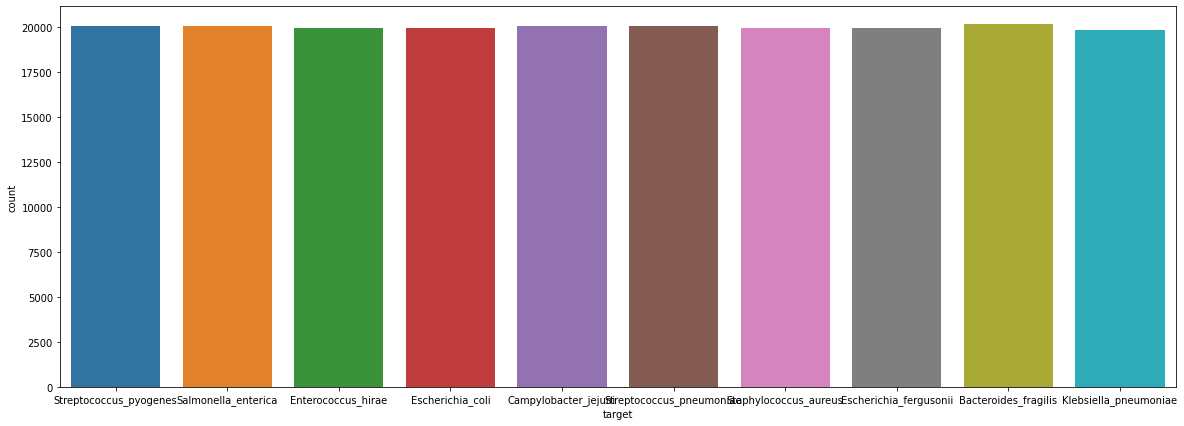

In [10]:
plt.figure(figsize = (20 , 7))
sns.countplot(data = train , x = 'target')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 437.9+ MB


In [12]:
train.describe()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,2.000000e+05
mean,6.421457e-07,-0.000003,-0.000014,-0.000010,0.000005,0.000025,0.000014,-0.000009,-0.000028,-0.000008,...,0.000135,0.000348,0.000253,0.000464,0.000581,0.000379,0.000062,8.982134e-05,1.170014e-04,2.215407e-07
std,8.654927e-05,0.000132,0.000287,0.000436,0.000683,0.000869,0.000775,0.000441,0.000107,0.000083,...,0.000711,0.001117,0.000914,0.001238,0.001528,0.001182,0.000466,5.475606e-04,6.788277e-04,2.050081e-05
min,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
25%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-9.536743e-06,-9.536743e-06,-9.536743e-07
50%,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000237,-0.000199,-0.000114,-0.000043,-0.000010,...,0.000014,0.000064,0.000047,0.000124,0.000114,0.000043,-0.000010,4.632568e-07,4.632568e-07,-9.536743e-07
75%,-9.536743e-07,-0.000003,-0.000013,-0.000004,-0.000011,0.000003,-0.000030,0.000004,-0.000028,-0.000010,...,0.000111,0.000463,0.000297,0.000684,0.000774,0.000365,0.000030,6.046326e-05,6.946326e-05,-9.536743e-07
max,9.999046e-03,0.009990,0.009957,0.009886,0.019800,0.019760,0.019800,0.009886,0.009957,0.009990,...,0.019957,0.019914,0.019957,0.019914,0.019914,0.019957,0.009990,9.990463e-03,1.999046e-02,9.990463e-04


In [13]:
train.groupby('target').describe()

A0T0G0C10                                            \
                             count          mean           std           min   
target                                                                         
Bacteroides_fragilis       20139.0 -1.343019e-09  2.442821e-05 -9.536743e-07   
Campylobacter_jejuni       20063.0  1.077368e-05  2.682630e-04 -9.536743e-07   
Enterococcus_hirae         19947.0 -8.997314e-07  2.259107e-07 -9.536743e-07   
Escherichia_coli           19958.0 -4.004626e-07  2.002817e-05 -9.536743e-07   
Escherichia_fergusonii     19937.0 -1.439236e-07  2.127481e-05 -9.536743e-07   
Klebsiella_pneumoniae      19847.0 -1.151681e-08  2.460516e-05 -9.536743e-07   
Salmonella_enterica        20030.0 -2.352020e-07  2.343929e-05 -9.536743e-07   
Staphylococcus_aureus      19929.0 -8.974246e-07  2.304090e-07 -9.536743e-07   
Streptococcus_pneumoniae   20074.0 -8.983291e-07  2.286586e-07 -9.536743e-07   
Streptococcus_pyogenes     20076.0 -8.980856e-07  2.291316e-07 -9.536743e-07   

                                                                    \
                                   25%           50%           75%   
target                                                               
Bacteroides_fragilis     -9.536743e-07 -9.536743e-07 -9.536743e-07   
Campylobacter_jejuni     -9.536743e-07 -9.536743e-07  3.046326e-06   
Enterococcus_hirae       -9.536743e-07 -9.536743e-07 -9.536743e-07   
Escherichia_coli         -9.536743e-07 -9.536743e-07 -9.536743e-07   
Escherichia_fergusonii   -9.536743e-07 -9.536743e-07 -9.536743e-07   
Klebsiella_pneumoniae    -9.536743e-07 -9.536743e-07 -9.536743e-07   
Salmonella_enterica      -9.536743e-07 -9.536743e-07 -9.536743e-07   
Staphylococcus_aureus    -9.536743e-07 -9.536743e-07 -9.536743e-07   
Streptococcus_pneumoniae -9.536743e-07 -9.536743e-07 -9.536743e-07   
Streptococcus_pyogenes   -9.536743e-07 -9.536743e-07 -9.536743e-07   

                                       A0T0G1C9            ...  A9T1G0C0  \
                                   max    count      mean  ...       75%   
target                                                     ...             
Bacteroides_fragilis      9.990463e-04  20139.0 -0.000005  ...  0.000072   
Campylobacter_jejuni      9.999046e-03  20063.0 -0.000004  ...  0.000411   
Enterococcus_hirae        4.632568e-08  19947.0 -0.000006  ...  0.000280   
Escherichia_coli          9.990463e-04  19958.0 -0.000006  ...  0.000030   
Escherichia_fergusonii    9.990463e-04  19937.0 -0.000006  ...  0.000036   
Klebsiella_pneumoniae     9.990463e-04  19847.0  0.000016  ...  0.000026   
Salmonella_enterica       9.990463e-04  20030.0 -0.000004  ...  0.000037   
Staphylococcus_aureus     4.632568e-08  19929.0 -0.000006  ...  0.000130   
Streptococcus_pneumoniae  4.632568e-08  20074.0 -0.000005  ...  0.000080   
Streptococcus_pyogenes    4.632568e-08  20076.0 -0.000005  ...  0.000098   

                                  A10T0G0C0                              \
                              max     count          mean           std   
target                                                                    
Bacteroides_fragilis      0.00999   20139.0 -4.038456e-07  1.591216e-06   
Campylobacter_jejuni      0.01999   20063.0 -4.816612e-07  1.346655e-06   
Enterococcus_hirae        0.00999   19947.0  4.787740e-06  5.300511e-05   
Escherichia_coli          0.00999   19958.0 -8.179894e-07  3.424623e-07   
Escherichia_fergusonii    0.00999   19937.0 -8.160408e-07  3.445236e-07   
Klebsiella_pneumoniae     0.00999   19847.0 -7.570199e-07  6.382867e-07   
Salmonella_enterica       0.00999   20030.0 -5.488316e-07  1.243529e-06   
Staphylococcus_aureus     0.00999   19929.0 -8.135268e-07  3.471487e-07   
Streptococcus_pneumoniae  0.00999   20074.0  2.580649e-06  3.680675e-05   
Streptococcus_pyogenes    0.00999   20076.0 -5.167845e-07  1.380726e-06   

                                                                    \
                                   min

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
X = train.drop('target' , axis = 1)
y = train['target']

In [16]:
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [19]:
lr = LogisticRegression(multi_class = 'multinomial' , max_iter = 1000)

In [20]:
lr.fit(X_train , y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [21]:
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_pred , y_test)

0.8744

In [24]:
## testing on test set 
test = ss.fit_transform(test)
y_pred = lr.predict(test)
y_pred

array([6, 6, 2, ..., 9, 0, 2])

In [25]:
predictions = le.inverse_transform(y_pred)

In [26]:
df = pd.DataFrame({'row_id':row_id , 'target':predictions})
df

,row_id,target
0,200000,Salmonella_enterica
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Streptococcus_pyogenes
99997,299997,Streptococcus_pyogenes
99998,299998,Bacteroides_fragilis


In [27]:
df.to_csv('submission.csv' ,index = False)